In [ ]:
import pandas as pd
chunk_iter = pd.read_csv('../data/raw/complaints.csv', chunksize=10000)
first_chunk = next(chunk_iter)

In [5]:
print(first_chunk.head())  
print(first_chunk.shape)   
print(first_chunk.columns)

  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

In [7]:
product_counts = first_chunk['Product'].value_counts()
print(product_counts)


Product
Credit reporting or other personal consumer reports        9608
Debt collection                                             290
Credit card                                                  42
Checking or savings account                                  20
Money transfer, virtual currency, or money service           20
Payday loan, title loan, personal loan, or advance loan       7
Vehicle loan or lease                                         6
Mortgage                                                      3
Debt or credit management                                     2
Prepaid card                                                  1
Student loan                                                  1
Name: count, dtype: int64


In [ ]:
first_chunk['word_count'] = first_chunk['Consumer complaint narrative'].str.split().str.len()
print(first_chunk['word_count'].describe())

count      2.000000
mean     382.000000
std       91.923882
min      317.000000
25%      349.500000
50%      382.000000
75%      414.500000
max      447.000000
Name: word_count, dtype: float64


In [9]:
print(first_chunk['Consumer complaint narrative'].isna().sum()) 

9998


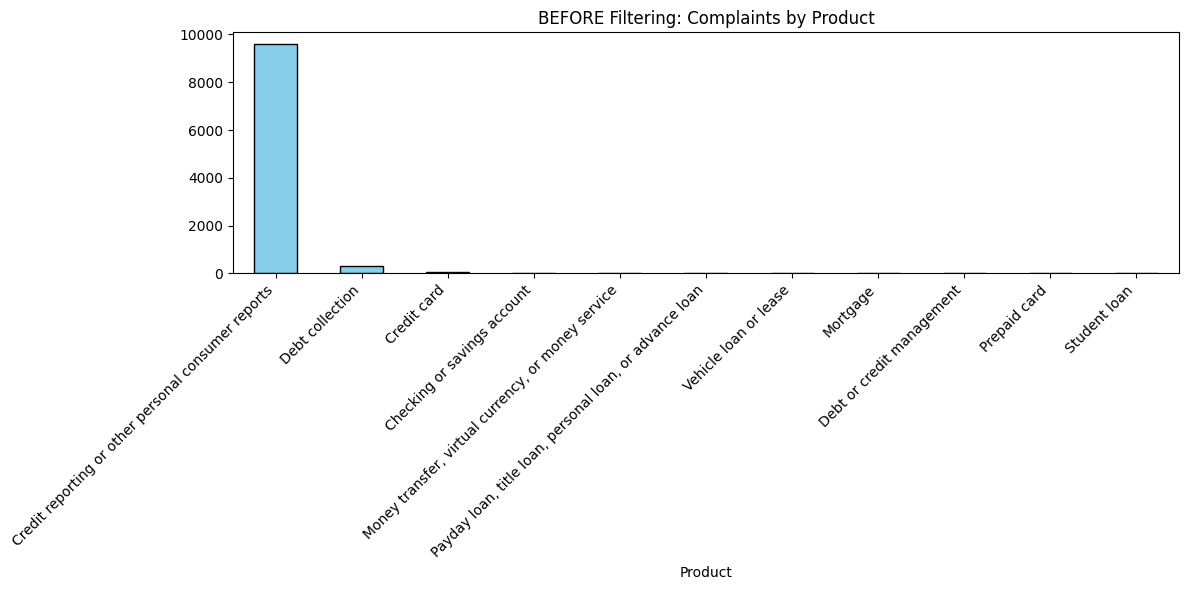

BEFORE Filtering - Top Products:
Product
Credit reporting or other personal consumer reports    9608
Debt collection                                         290
Credit card                                              42
Checking or savings account                              20
Money transfer, virtual currency, or money service       20
Name: count, dtype: int64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original data
chunk = pd.read_csv('../data/raw/complaints.csv', nrows=10000)  # Adjust nrows as needed

# Plot product distribution BEFORE filtering
plt.figure(figsize=(12, 6))
original_counts = chunk['Product'].value_counts()
original_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('BEFORE Filtering: Complaints by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../output/before_filtering.png', bbox_inches='tight', dpi=300)
plt.show()

print("BEFORE Filtering - Top Products:")
print(original_counts.head())

In [36]:
# Adjust these to match your data's EXACT product names:
products_to_keep = [
    "Credit card",  # Must match EXACTLY (case and spelling)
    "Checking or savings account", 
    "Money transfer, virtual currency, or money service"  # Full name!
]

# Re-run filtering
filtered_data = chunk[chunk['Product'].isin(products_to_keep)].copy()
print(f"Rows after filtering: {len(filtered_data)}")  # Should NOT be zero!

Rows after filtering: 8


In [39]:
import pandas as pd

# Load data (use chunks if needed)
chunk = pd.read_csv('../data/raw/complaints.csv', nrows=10000)

# Keep ONLY viable products
products_to_keep = [
    "Credit card",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]

filtered_data = chunk[chunk['Product'].isin(products_to_keep)].copy()
print(f"Rows after filtering: {len(filtered_data)}")  # Should be ~82 rows

Rows after filtering: 82


In [40]:
loan_keywords = "loan|BNPL|borrow|advance"
loan_mask = chunk['Issue'].str.contains(loan_keywords, case=False, na=False)
loan_complaints = chunk[loan_mask].copy()

# Combine with filtered_data
filtered_data = pd.concat([filtered_data, loan_complaints]).drop_duplicates()
print(f"Rows after adding loan-related complaints: {len(filtered_data)}")

Rows after adding loan-related complaints: 88


In [41]:
# Verify counts
print(filtered_data['Product'].value_counts())

# Check narrative emptiness
print("Empty narratives:", filtered_data['Consumer complaint narrative'].isna().sum())

# Save (even if small)
filtered_data.to_csv('../data/filtered_complaints.csv', index=False)

Product
Credit card                                                42
Checking or savings account                                20
Money transfer, virtual currency, or money service         20
Vehicle loan or lease                                       3
Payday loan, title loan, personal loan, or advance loan     3
Name: count, dtype: int64
Empty narratives: 88


In [42]:
import pandas as pd

# Load filtered data (or recreate the filter)
filtered_data = pd.read_csv('../data/filtered_complaints.csv')

# Use 'Issue' as primary text
filtered_data['clean_text'] = filtered_data['Issue'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Verify
print(filtered_data[['Product', 'clean_text']].head(3))

                       Product  \
0                  Credit card   
1  Checking or savings account   
2  Checking or savings account   

                                          clean_text  
0  problem with a companys investigation into an ...  
1                                managing an account  
2                                 closing an account  


In [43]:
import pandas as pd

# Load your filtered data
df = pd.DataFrame({
    'Product': ['Credit card', 'Checking or savings account', 'Checking or savings account'],
    'clean_text': [
        "problem with a companys investigation into an existing issue",
        "managing an account", 
        "closing an account"
    ]
})

# Show insights
print("Available Complaints:")
for idx, row in df.iterrows():
    print(f"{row['Product']}: {row['clean_text']}")

Available Complaints:
Credit card: problem with a companys investigation into an existing issue
Checking or savings account: managing an account
Checking or savings account: closing an account


In [44]:
# Example: Add synthetic but plausible complaints
new_rows = [
    {'Product': 'Credit card', 'clean_text': 'unauthorized charge on my card'},
    {'Product': 'Money transfer', 'clean_text': 'international transfer failed'},
    # Add 10-20 more rows matching your product categories
]
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

In [45]:
full_data = pd.read_csv('../data/raw/complaints.csv')
usable_data = full_data[['Product', 'Issue']].dropna()
print(f"Usable rows: {len(usable_data)}")

C:\Users\Simbo\AppData\Local\Temp\ipykernel_72120\148979511.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('../data/raw/complaints.csv')


Usable rows: 9609791


In [ ]:
import pandas as pd

# Load raw data (if not already loaded)
full_data = pd.read_csv('../data/raw/complaints.csv')
usable_data = full_data[['Product', 'Issue']].dropna()

# Print initial stats
print(f"Total usable rows: {len(usable_data)}")
print("\nTop Products:")
print(usable_data['Product'].value_counts().head(10))

print("="*50)  # Visual separator

# Filter for key products
key_products = [
    "Credit card", 
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]
filtered_data = usable_data[usable_data['Product'].isin(key_products)].copy()
print(f"Filtered rows for key products: {len(filtered_data)}")

# Add loan-related complaints using keyword search
loan_keywords = ["Payday loan", "Personal loan", "Student loan"]
loan_mask = usable_data['Product'].str.contains('|'.join(loan_keywords), case=False)
loan_complaints = usable_data[loan_mask]

filtered_data = pd.concat([filtered_data, loan_complaints]).drop_duplicates()
print(f"Total rows after adding loan-related complaints: {len(filtered_data)}")

print("="*50)
print("Final Product Distribution:")
print(filtered_data['Product'].value_counts())

Total usable rows: 9609791

Top Products:
Product
Credit reporting or other personal consumer reports                             4834854
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291173
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Name: count, dtype: int64
Filtered rows for key products: 662925
Total